In [24]:

%load_ext autoreload
%autoreload 2

import numpy as np
from misc import *
import matplotlib.pyplot as plt
from analyze import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [28]:
periods, ppp, itraj = 10, 1000, 0

In [35]:
histories={}
for k in range(1,9):
    #hist_A, hist_loss, hist_grads
    try:
        histories[k] = load_train_results(periods=periods, ppp=ppp, train_id=k)
    except Exception:
        pass

In [32]:
histories.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8])

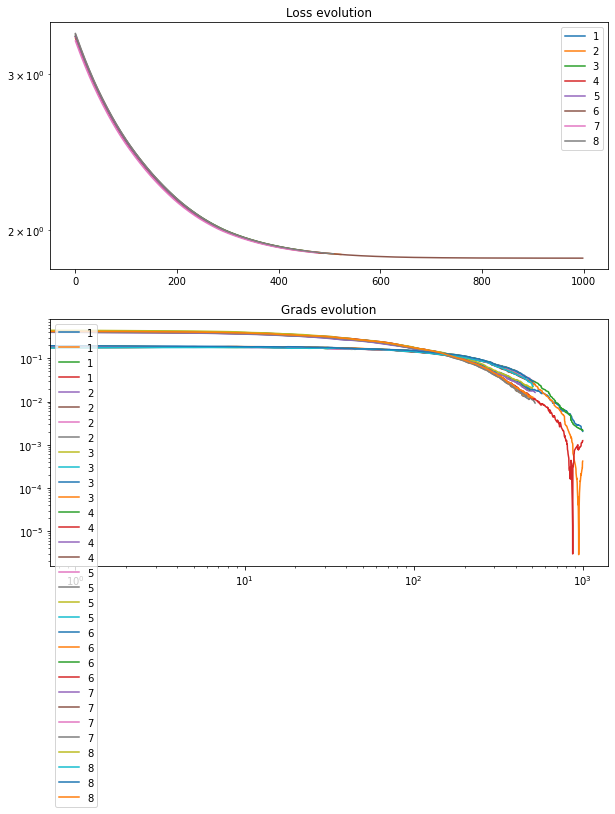

In [36]:
fig_size=(10,10)
fig = plt.figure(figsize=fig_size)

fig = display_histories(fig,histories)


In [37]:
for k in list(histories.keys()):
    print(histories[k][0][-1], "\n")

[[-2.0348835  2.95781  ]
 [-3.084081  -1.9801474]] 

[[-2.2804573  3.3372755]
 [-3.433307  -2.1138391]] 

[[-2.1674883  3.1136854]
 [-3.19561   -2.0386393]] 

[[-2.2346108  3.2413595]
 [-3.3759897 -2.0346682]] 

[[-2.1117413  3.061299 ]
 [-3.1157827 -1.991474 ]] 

[[-2.6162896  3.7285469]
 [-4.0239534 -2.2176611]] 

[[-2.2270775  3.2233546]
 [-3.3379803 -2.0527997]] 

[[-2.194591   3.3520103]
 [-3.3667953 -2.091927 ]] 



In [38]:
histories[k][0][0]

array([[0.03453407, 0.05083209],
       [0.01231212, 0.00034989]], dtype=float32)

In [12]:
means, covs, signals, coeffs = load_data(get_def_path()+"20periods/1000ppp/")

In [13]:
A, dt, C, D = coeffs

In [16]:
D

array([[3.5, 0. ],
       [0. , 3.5]], dtype=float32)